<a href="https://colab.research.google.com/github/srijapamu25/project1/blob/main/Health_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step-1: Loading and Exploring the data:**

In [ ]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load the file

df = pd.read_csv("/content/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [ ]:
# Converting categorical variables into numeric values

df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df['region'] = df['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2,10600.54830
1334,18,1,31.920,0,0,3,2205.98080
1335,18,1,36.850,0,0,1,1629.83350
1336,21,1,25.800,0,0,0,2007.94500


**Step-2: EDA - Exploratory Data Analysis**

**A. Scatter plot**

<Axes: xlabel='age', ylabel='charges'>

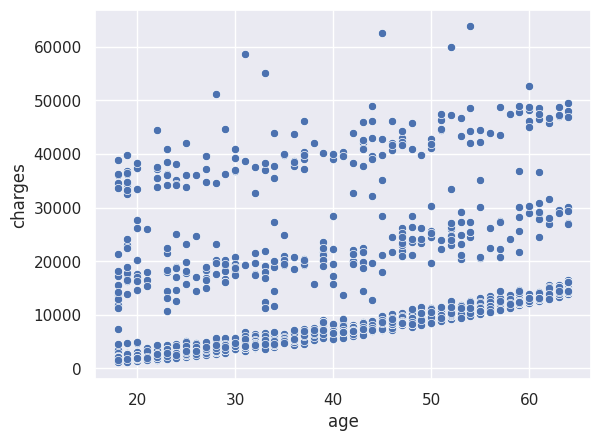

In [ ]:
#Age vs Charges
sns.set_theme(style="darkgrid")
sns.scatterplot(x="age", y="charges", data=df)

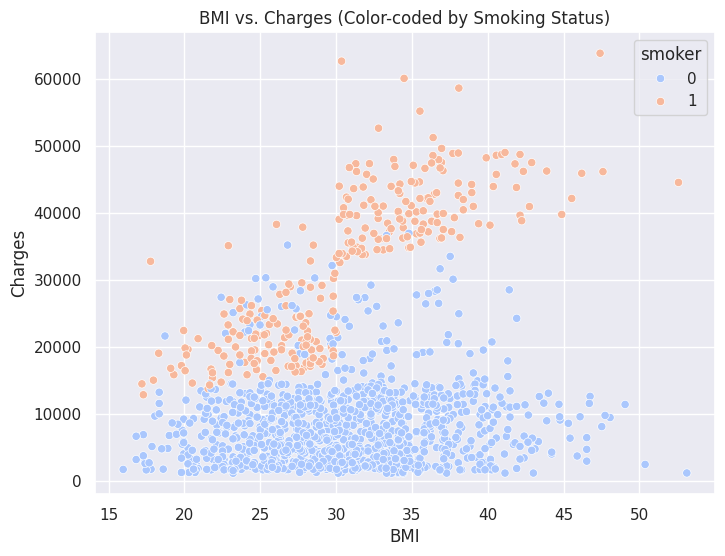

In [ ]:
# BMI vs. Charges
plt.figure(figsize=(8,6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, palette='coolwarm')
plt.title('BMI vs. Charges (Color-coded by Smoking Status)')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

**B. Histogram**

In [ ]:
sns.set(style="whitegrid")

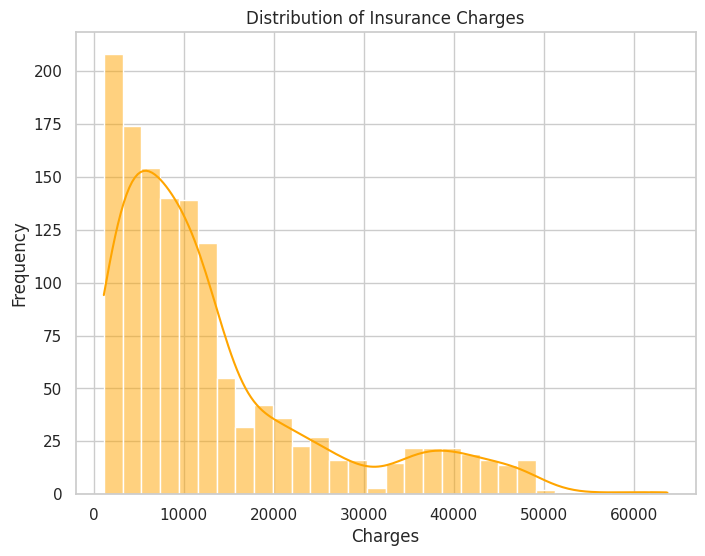

In [ ]:
# Distribution of insurance charges
plt.figure(figsize=(8,6))
sns.histplot(df['charges'], kde=True, bins=30, color='orange')
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

**C. Box plot**

<ipython-input-12-a76749b282c9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y='charges', data=df, palette='pastel')


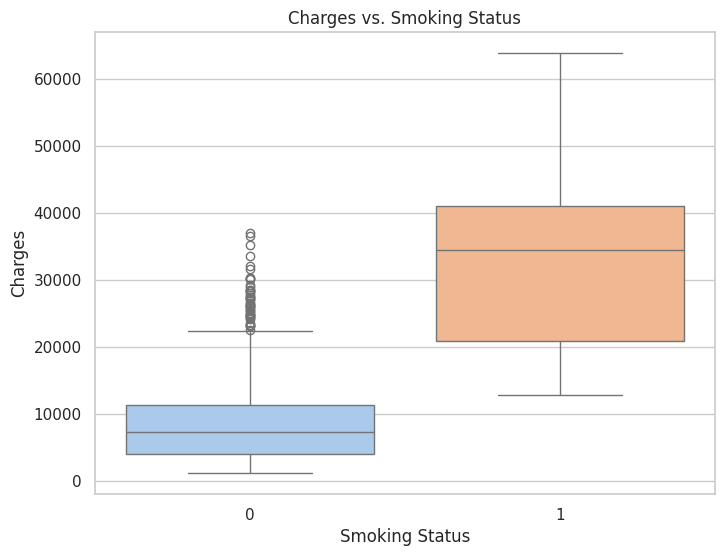

In [ ]:
# Charges vs. Smoking status

plt.figure(figsize=(8,6))
sns.boxplot(x='smoker', y='charges', data=df, palette='pastel')
plt.title('Charges vs. Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Charges')
plt.show()

<ipython-input-13-756fe1937462>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='charges', data=df, palette='Set2')


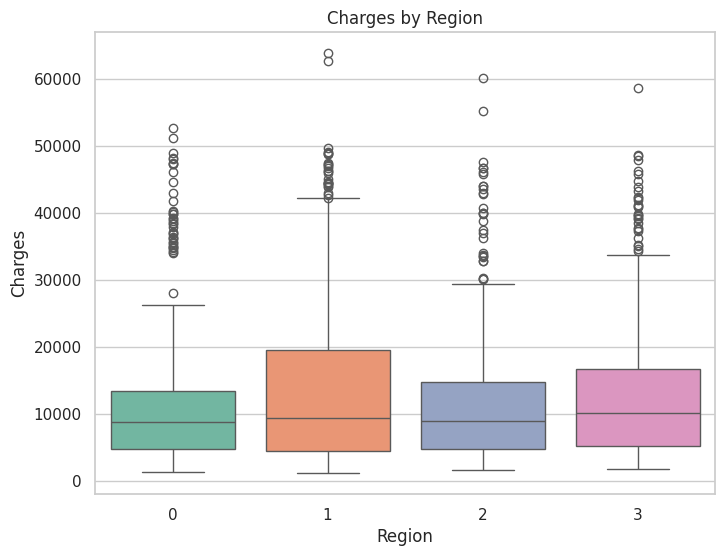

In [ ]:
# Charges by Region
plt.figure(figsize=(8, 6))
sns.boxplot(x='region', y='charges', data=df, palette='Set2')
plt.title('Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

**D. Heat map**

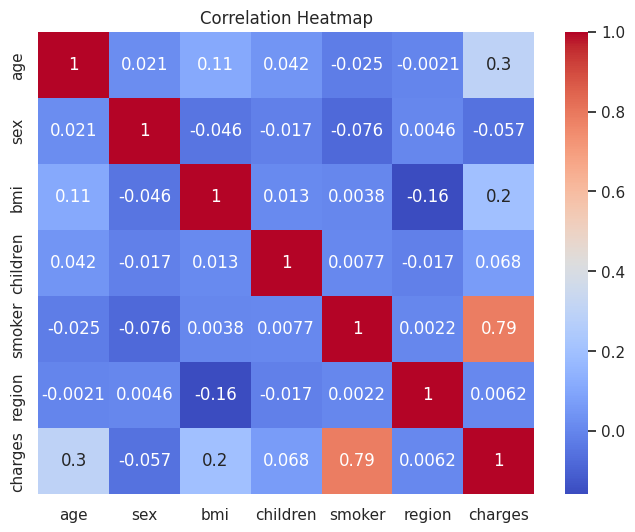

In [ ]:
plt.figure(figsize=(8,6))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Step-3: Predictive Modelling**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
## Preprocess the data
# Define features (X) and target variable (y)
X = df.drop(columns=['charges'])
y = df['charges']

In [ ]:
# Normalize numerical features for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
## Train the Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
## Evaluate the model
y_pred = model.predict(X_test)

# Calculate RMSE manually (square root of MSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared value

In [ ]:
print("Model Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Model Performance:
RMSE: 5799.59
R^2 Score: 0.78


**Step-4: Clustering**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
# Applying K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['cluster'] = clusters

In [ ]:
## Visualize clustersusing PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

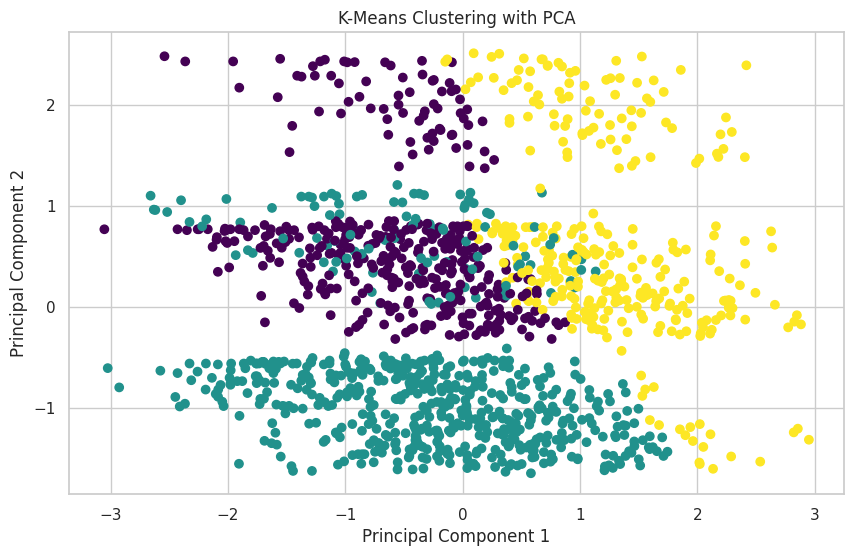

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis')
plt.title('K-Means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**Step-5: Analyze Clusters:**

In [ ]:
# Grouping data by clusters

cluster_analysis = df.groupby('cluster').mean()

In [ ]:
print("Cluster Analysis:")
print(cluster_analysis)

Cluster Analysis:
               age       sex        bmi  children    smoker    region  \
cluster                                                                 
0        37.002584  0.000000  27.908928  0.948320  0.186047  2.126615   
1        39.027113  1.000000  29.837544  1.020734  0.162679  1.551834   
2        42.188272  0.108025  35.551636  1.413580  0.308642  0.586420   

              charges  
cluster                
0        10899.708277  
1        11954.233759  
2        18649.176916  


<ipython-input-38-98578ae391d9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='charges', data=df, palette='Set2')


<function matplotlib.pyplot.show(close=None, block=None)>

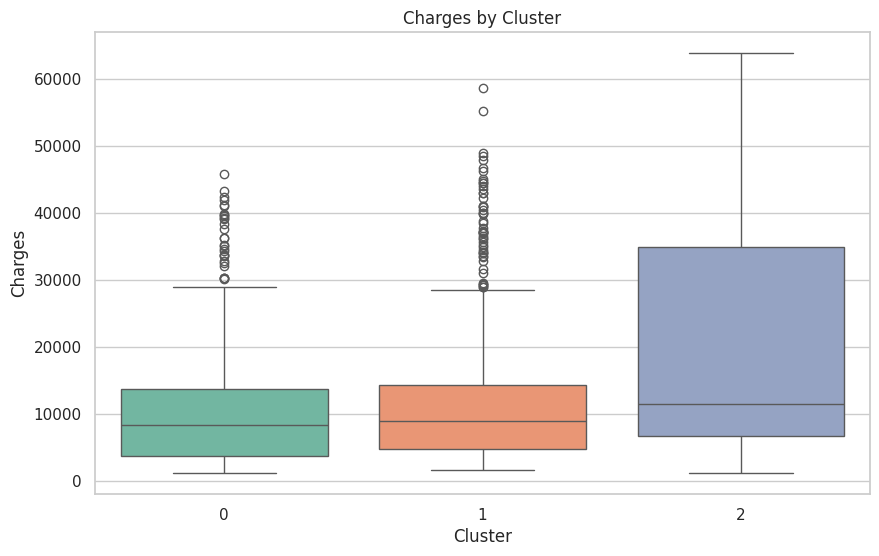

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='charges', data=df, palette='Set2')
plt.title('Charges by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Charges')
plt.show

**Step-6: Test Hypothesis -
Independent t-Test for Smokers vs. Non-Smokers**

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
# Separate smokers and non-smokers
smokers = df[df['smoker'] == 1]['charges']
non_smokers = df[df['smoker'] == 0]['charges']

In [ ]:
# Perform t-test
t_stat, p_value = ttest_ind(smokers, non_smokers, equal_var=False) # using Welch's t-test
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 32.751887766341824
P-value: 5.88946444671698e-103


In [ ]:
print("T-Test Results for Smokers vs Non-Smokers:")
print(f"T-Statistic: {t_stat:.2f}, P-Value: {p_value:.2e}")

T-Test Results for Smokers vs Non-Smokers:
T-Statistic: 32.75, P-Value: 5.89e-103


In [ ]:
# Check significance
if p_value < 0.05:
    print("Reject the null hypothesis: Smokers incur significantly higher charges.")
else:
    print("Fail to reject the null hypothesis: No significant difference in charges.")

Reject the null hypothesis: Smokers incur significantly higher charges.
